In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
from os import walk
from matplotlib import pyplot as plt

#load data
all_dx = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy')
sub_list = np.load('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy')
dx_array = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy')

sub_list = list(sub_list)

In [92]:
lang_file = '../sourcedata/data/HBN/phenotype/language_tasks_all_par_2021_08_17.csv'
#dx = pd.read_csv(dx_file,skipfooter=6)
lang = pd.read_csv(lang_file)

In [93]:
lang.replace('.', np.nan, inplace=True)
lang = lang.dropna()
lang['Identifiers'] = lang['Identifiers'].str.slice_replace(12, 24, '')
lang

,Identifiers,"CELF,CELF_CriterionScore","CELF,CELF_ExceedCutoff","CELF,CELF_Total","CTOPP,CTOPP_BW_P","CTOPP,CTOPP_BW_R","CTOPP,CTOPP_BW_S","CTOPP,CTOPP_EL_P","CTOPP,CTOPP_EL_R","CTOPP,CTOPP_EL_S",...,"GFTA,GFTA_SIW_Raw","GFTA,GFTA_SIW_Stnd","TOWRE,TOWRE_PDE_Perc","TOWRE,TOWRE_PDE_Raw","TOWRE,TOWRE_PDE_Scaled","TOWRE,TOWRE_SWE_Perc","TOWRE,TOWRE_SWE_Raw","TOWRE,TOWRE_SWE_Scaled","TOWRE,TOWRE_Total_Perc","TOWRE,TOWRE_Total_Scaled"
2,NDARAA117NEJ,14,0,11,25,19,8,16,13,7,...,3,97,19,11,87,16,28,85,16,85
3,NDARAA306NT2,22,0,16,2,17,4,2,16,4,...,0,100,1,15,64,14,73,84,3,73
5,NDARAA504CRN,11,1,12,9,17,6,5,15,5,...,0,106,2,10,69,18,57,86,5,76
7,NDARAA947ZG5,18,0,16,1,14,3,1,14,3,...,0,104,45,44,98,65,85,106,55,102
8,NDARAA948VFH,17,0,14,25,21,8,50,25,10,...,0,108,39,24,96,73,63,109,58,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,NDARZZ007YMP,21,1,26,1,16,3,50,31,10,...,0,102,79,59,112,75,96,110,79,112
3458,NDARZZ740MLM,13,0,6,9,11,6,5,3,5,...,0,115,9,3,80,13,13,83,10,81
3459,NDARZZ810LVF,17,0,15,16,20,7,50,24,10,...,1,102,25,23,90,45,60,98,35,94
3460,NDARZZ830JM7,18,1,24,2,16,4,1,14,3,...,0,104,45,44,98,55,82,102,50,100


In [94]:
lang_list = []
for i,s in enumerate(sub_list[:10]):
    try:
        to_append=lang[lang['Identifiers'].str.match(s)].drop('Identifiers', axis=1).values
        lang_list.append(to_append)
    except:
        print('missing')
lang_list

[array([], shape=(0, 32), dtype=object),
 array([], shape=(0, 32), dtype=object),
 array([['14', '0', '11', '25', '19', '8', '16', '13', '7', '0.4', '7',
         '2', '25', '29', '8', '25', '31', '8', '88', '21', '16', '42',
         '3', '97', '19', '11', '87', '16', '28', '85', '16', '85']],
       dtype=object),
 array([['22', '0', '16', '2', '17', '4', '2', '16', '4', '2', '12', '4',
         '9', '16', '6', '9', '16', '6', '76', '5', '12', '50', '0',
         '100', '1', '15', '64', '14', '73', '84', '3', '73']],
       dtype=object),
 array([], shape=(0, 32), dtype=object),
 array([['11', '1', '12', '9', '17', '6', '5', '15', '5', '25', '16', '8',
         '37', '17', '9', '37', '19', '9', '95', '37', '18', '66', '0',
         '106', '2', '10', '69', '18', '57', '86', '5', '76']],
       dtype=object),
 array([], shape=(0, 32), dtype=object),
 array([['18', '0', '16', '1', '14', '3', '1', '14', '3', '1', '11', '3',
         '5', '18', '5', '25', '16', '8', '79', '8', '13', '61',

In [ ]:
# a list of dx
# a list of data/embeddings

In [47]:
lang_data = lang.drop('Identifiers', axis=1).values
lang_data.shape

(2210, 32)

In [6]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(lang_data)
embedding.shape

(2210, 2)

Text(0.5, 1.0, 'UMAP projection of the HBN Language assessment data')

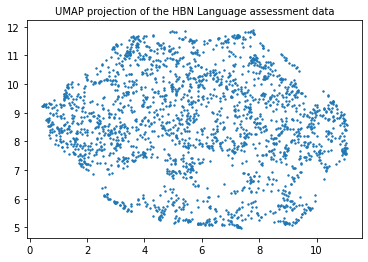

In [7]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],2)
    #c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the HBN Language assessment data', fontsize=10)

In [14]:
list(all_dx).index('Language Disorder')

44

In [15]:
sub_list

['NDARAA075AMK',
 'NDARAA112DMH',
 'NDARAA117NEJ',
 'NDARAA306NT2',
 'NDARAA358BPN',
 'NDARAA504CRN',
 'NDARAA536PTU',
 'NDARAA947ZG5',
 'NDARAA948VFH',
 'NDARAB055BPR',
 'NDARAB342VLM',
 'NDARAB348EWR',
 'NDARAB375XZ1',
 'NDARAB458VK9',
 'NDARAB514MAJ',
 'NDARAB696MF4',
 'NDARAB708LM5',
 'NDARAB756JDJ',
 'NDARAB793GL3',
 'NDARAC331VEH',
 'NDARAC349YUC',
 'NDARAC350BZ0',
 'NDARAC350XUM',
 'NDARAC462DZH',
 'NDARAC495TJ2',
 'NDARAC850DCN',
 'NDARAC853CR6',
 'NDARAC853DTE',
 'NDARAC857HDB',
 'NDARAC904DMU',
 'NDARAD123TUZ',
 'NDARAD224CRB',
 'NDARAD232HVV',
 'NDARAD481FXF',
 'NDARAD571FLB',
 'NDARAD615WLJ',
 'NDARAD703XA2',
 'NDARAD774HAZ',
 'NDARAE012DGA',
 'NDARAE199TDD',
 'NDARAE264WPZ',
 'NDARAE270LEZ',
 'NDARAE301XTM',
 'NDARAE358VBE',
 'NDARAE480GGU',
 'NDARAE710YWG',
 'NDARAE828CML',
 'NDARAE866UVF',
 'NDARAE877NER',
 'NDARAF003VCL',
 'NDARAF440XWG',
 'NDARAF485ZNC',
 'NDARAF535XK6',
 'NDARAG115LZP',
 'NDARAG139HKA',
 'NDARAG143ARJ',
 'NDARAG191AE8',
 'NDARAG340ERT',
 'NDARAG584XLU